In [1]:
import numpy as np

class LogReg:
        
    def __init__(self,eta=0.1,n_iter=100,rand_st=1):
        self.eta=eta
        self.n_iter=n_iter
        self.rand_st=1

    def fit(self,X,Y):
        rgen = np.random.RandomState(self.rand_st)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b = np.float_(0.)

        for i in range(self.n_iter):
            inp=self.z_calculate(X)
            sigm=self.activation(inp)
            err=Y-sigm
            self.w+=self.eta*np.dot(X.T,err)/ X.shape[0]
            self.b+=self.eta*err.mean()
            
    def z_calculate(self,X):
        return np.dot(X,self.w)+self.b

    def activation(self,z):
        return 1./(1.+np.exp(-z))

    def predict(self, X):
        return np.where(self.activation(self.z_calculate(X)) >= 0.5,1,0)

In [21]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

df = df[(df['species'] == 0) | (df['species'] == 1)]
df = df[['petal length (cm)', 'petal width (cm)', 'species']]

X = df.drop(columns=['species']).values
y = df['species'].values

print(df.head())

   petal length (cm)  petal width (cm)  species
0                1.4               0.2        0
1                1.4               0.2        0
2                1.3               0.2        0
3                1.5               0.2        0
4                1.4               0.2        0


In [22]:
lg=LogReg()
lg.fit(X,y)

In [23]:
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

  
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  

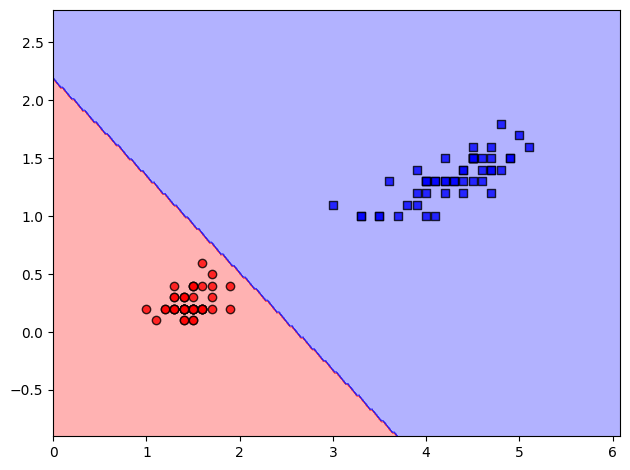

In [17]:
plot_decision_regions(X, y,classifier=lg)
plt.tight_layout()

plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
lg_st=LogReg()
lg_st.fit(X,y)

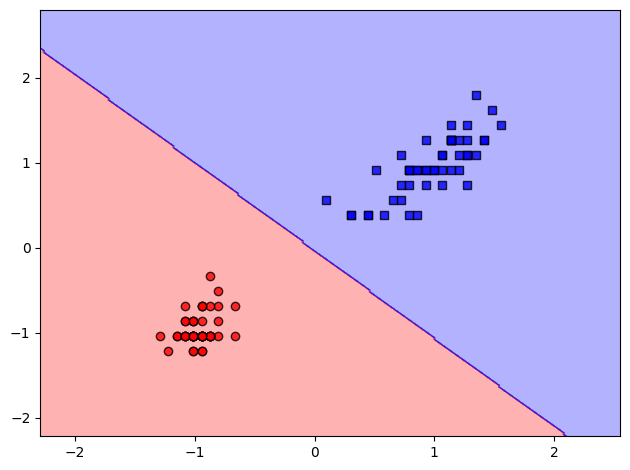

In [27]:
plot_decision_regions(X, y,classifier=lg_st)
plt.tight_layout()

plt.show()